<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Manual_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

In [111]:
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [46]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")
df[df["Y house price of unit area"] == 117.5]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5


In [68]:
x = np.array(df["X2 house age"])
y = np.array(df["Y house price of unit area"])

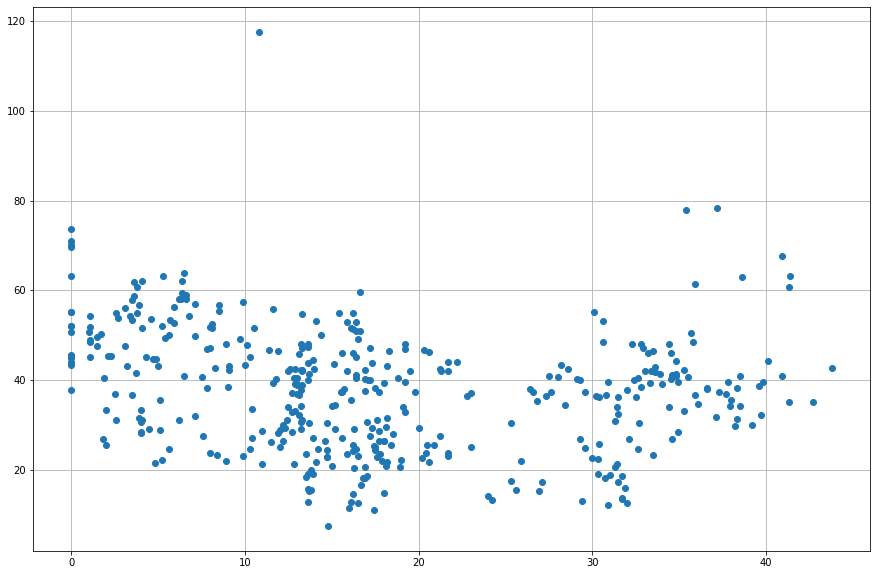

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, "o")
plt.grid()

In [13]:
def line(theta0, theta1, X):

  h = np.array ( theta0 + (theta1 * X) )
  
  return h

# Wrong Gredient Descent

In [14]:
def error(theta0, theta1, X):
  
  E  = 0.5 * sum( (line(theta0, theta1, X) - y)**2 )

  return E

In [15]:
def diff_E(theta0, theta1, X):
  
  dE = sum((line(theta0, theta1, X) - y))

  return dE

In [19]:
#  1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, # , 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000

alpha  = [ 1e-6, 1e-5, 1e-4]
steps  = []
theta0 = []
theta1 = []

for i in alpha:
  B0, B1 = np.random.rand(), np.random.rand()
  iter = 0
  dx = 0.000001
  dE = diff_E(B0, B1, x)
  
  while (abs(dE) > dx) and (iter < 10000) :
    
    B0_new = B0 - (i * (diff_E(B0, B1, x)))
    B1_new = B1 - (i * (diff_E(B0, B1, x)))
    
    dE = diff_E(B0_new, B1_new, x)

    B0 = B0_new
    B1 = B1_new
    
    iter += 1

  steps.append(iter)

  theta0.append(B0)
  theta1.append(B1)

  print(i, iter)

Thetas = list(zip(theta0, theta1))
print(Thetas)

1e-06 2995
1e-05 288
0.0001 16
[(2.473568725040375, 2.0046014655446487), (1.7153517176883584, 2.0474082078191147), (2.1253983236085325, 2.0242581608492864)]


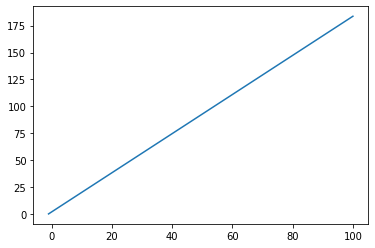

In [20]:
x = np.linspace(-1, 100, 200)
y = 2.04169 + 1.816538 * x
plt.plot(x, y)
plt.show()

Minimum : 16 
Index of Min Steps : 2 
Value of a for min steps : 0.0001

theta0 is :2.1253983236085325
theta1 is :2.0242581608492864


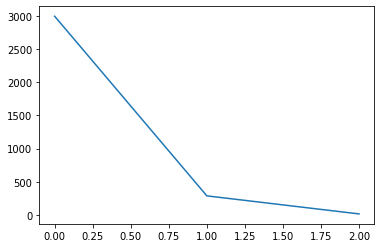

In [21]:

print(f"Minimum : {min(steps)} \nIndex of Min Steps : {steps.index(min(steps))} \nValue of a for min steps : {alpha[steps.index(min(steps))]}\n")
print(f"theta0 is :{(Thetas[steps.index(min(steps))])[0]}\ntheta1 is :{(Thetas[steps.index(min(steps))])[1]}")
plt.plot(steps)


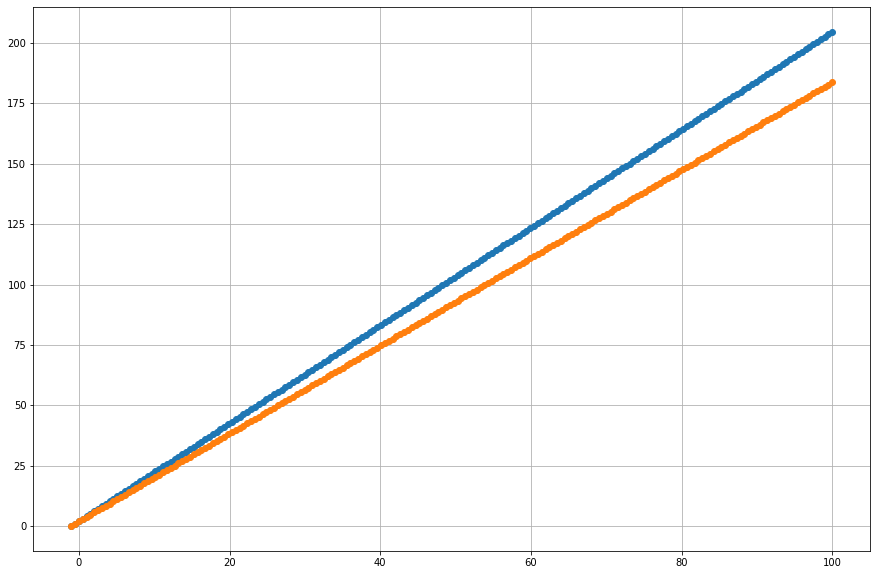

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(x, line((Thetas[steps.index(min(steps))])[0], (Thetas[steps.index(min(steps))])[1], x), '-o')
plt.plot(x, y, "o")
plt.grid()
plt.show()

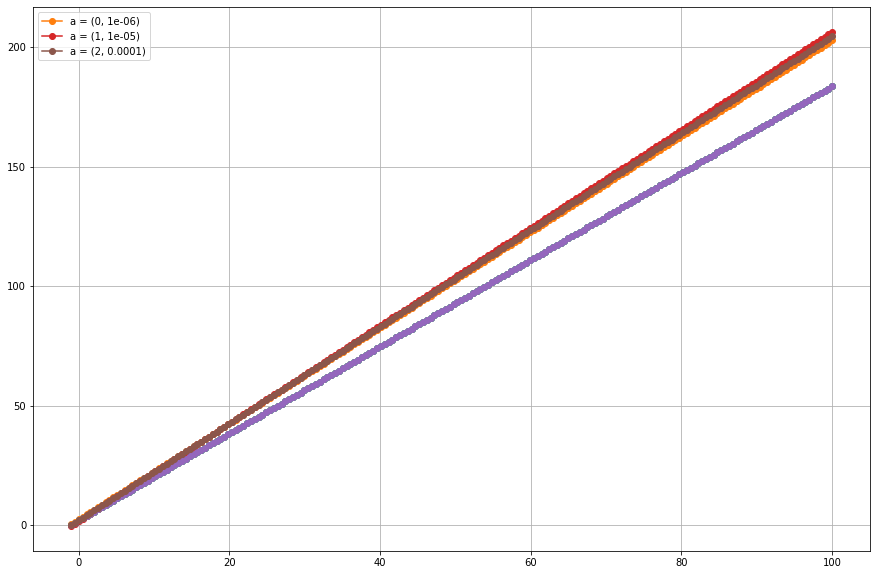

In [25]:
plt.figure(figsize=(15, 10))
#plt.plot(x, line( (Thetas[8][0]), (Thetas[8][1]), x), '-x', label= f"a = {8, alpha[8]}")


for i in range(len(Thetas)):
  plt.plot(x, y, "o")
  plt.plot(x, line( (Thetas[i][0]), (Thetas[i][1]), x), '-o', label= f"a = {i, alpha[i]}")
  plt.grid()
  plt.legend()
  plt.plot()


---------------------------------

# --> Correct Linear Regression algorithm

In [112]:
x = df['X2 house age']
y = df["Y house price of unit area"]

In [119]:
t1 = dt.datetime.now()
B0, B1 = np.random.rand(), np.random.rand()
lr =  1e-7
Error_list = []

for itr in tqdm(range(50)):
  error_cost = 0
  cost_B0    = 0
  cost_B1    = 0

  for i in range(len(x)):
    y_pred = B0 + (B1 * x[i])

    error_cost += (y[i] - y_pred) ** 2
    #print(error_cost)
    for j in range(len(x)):
      diff_B0 = -2 * (y[j] - (B0 + B1 * x[j]))
      diff_B1 = (-2 * x[j]) * (y[j] - (B0 + B1 * x[j]))

      cost_B0 += diff_B0
      cost_B1 += diff_B1
    
    B0 -= lr * cost_B0
    B1 -= lr * cost_B1
  Error_list.append(error_cost)
t2 = dt.datetime.now()

T1 = t2 - t1

100%|██████████| 50/50 [02:28<00:00,  2.97s/it]


In [120]:
print(T1)

0:02:28.649385


In [71]:
Error_list

[192688.02540112686,
 89133.79711140686,
 80724.82694256512,
 72728.31341863336,
 73923.34454698769,
 72822.60208434811,
 73220.75100513198,
 73008.12454939894,
 73102.58606219292,
 73056.71528611821]

In [72]:
B0

42.42040847983379

In [75]:
B1

-0.25134940879638135

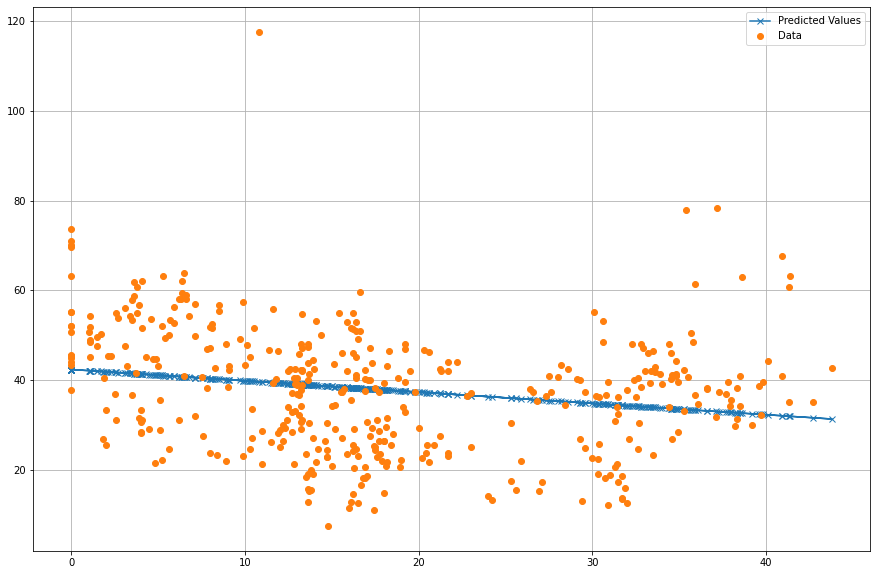

In [74]:
plt.figure(figsize=(15, 10))
plt.plot(x, line(B0, B1, x), '-x', label = "Predicted Values")
plt.plot(x, y, 'o', label= "Data")
plt.legend()
plt.grid()

In [77]:
pred = line(B0, B1, 2)
print(pred)

41.91770966224102


# Effect of outliers in plotted line

In [78]:
new_df = df.drop(index = 270)

In [79]:
x = np.array(new_df["X2 house age"])
y = np.array(new_df["Y house price of unit area"])

In [80]:
print(len(x), len(y))

413 413


In [121]:
t1_new = dt.datetime.now()
B0, B1 = np.random.rand(), np.random.rand()
lr =  1e-7
Error_list = []

for itr in tqdm(range(50)):
  error_cost = 0
  cost_B0    = 0
  cost_B1    = 0

  for i in range(len(x)):
    y_pred = B0 + (B1 * x[i])

    error_cost += (y[i] - y_pred) ** 2
    #print(error_cost)
    for j in range(len(x)):
      diff_B0 = -2 * (y[j] - (B0 + B1 * x[j]))
      diff_B1 = (-2 * x[j]) * (y[j] - (B0 + B1 * x[j]))

      cost_B0 += diff_B0
      cost_B1 += diff_B1
    
    B0 -= lr * cost_B0
    B1 -= lr * cost_B1
  Error_list.append(error_cost)
t2_new = dt.datetime.now()
T2 = t2_new - t1_new

100%|██████████| 50/50 [02:26<00:00,  2.93s/it]


In [122]:
print(T2)

0:02:26.270686


In [106]:
print(B0, B1)

42.06793859024131 -0.24142452463962102


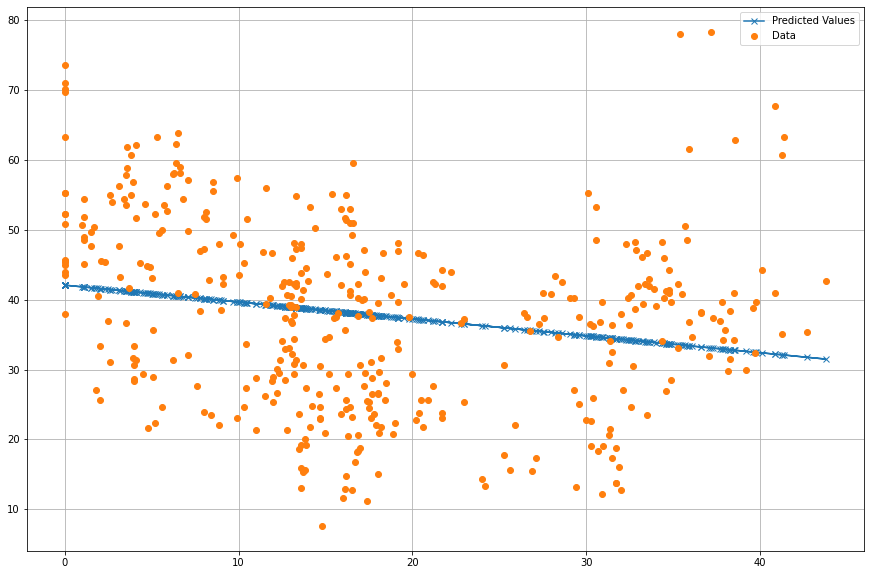

In [107]:
plt.figure(figsize=(15, 10))
plt.plot(x, line(B0, B1, x), '-x', label = "Predicted Values")
plt.plot(x, y, 'o', label= "Data")
plt.legend()
plt.grid()

In [108]:
new_pred = line(B0, B1, 2)
print(new_pred)

41.585089540962066


In [109]:
print( np.round((pred), 2), 'predicted value with outlier' )
print( np.round(new_pred, 2), 'predicted value without outlier\n' )
print( np.round(((pred - new_pred)/ pred) * 100, 2), '% error in predicted value with outlier' )

41.92 predicted value with outlier
41.59 predicted value without outlier

0.79 % error in predicted value with outlier


In [133]:
#plt.bar(['T1', 'T2'], [T1, T2], width = 0.5)

# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
%%timeit
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)


UsageError: Line magic function `%%timeit` not found.


<Figure size 720x360 with 0 Axes>